In [23]:
# Лабораторная работа № 3
### вариант № 2   Лила.В.Я
### группа: РИМ-101211                

In [24]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
%matplotlib inline

In [25]:
### Расчитываем регрессионную модель тренда первого порядка

##### Для этого решаем систему линейных уравнений

B0: 23.130466666666685       B1: -20.43760000000001


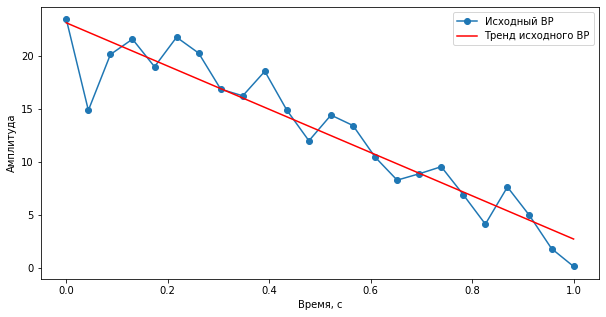

In [26]:
t = np.linspace(0, 1, 24)
# Исходные данные согласно варианту № 2
Y = np.array([
    23.46, 14.86,	20.14,	21.59,	18.98,	21.77,	20.27,	16.86,	16.23,	18.55,	14.87,	11.98,	14.41,	13.42,	10.44,	8.26, 8.86,	9.53,	6.88,	4.10,	7.61,	4.92,	1.79,	0.10 ])

plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
X = np.vstack([np.ones(len(t)),t]).T # добавляем столбец единиц в массив времени
B = np.linalg.lstsq(X,Y,rcond=-1) #  решение системы уравнений

print('B0:',B[0][0],'     ','B1:',B[0][1])
plt.plot(t,B[0][0]+B[0][1]*t,'r',label='Тренд исходного ВР')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

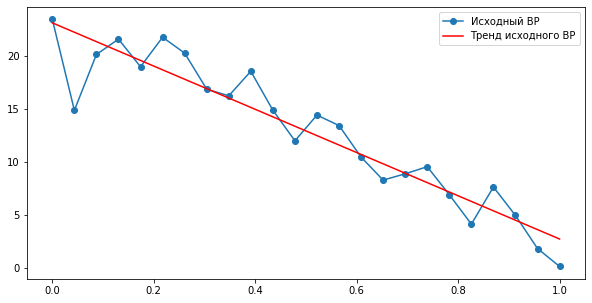

In [27]:
bb = np.polyfit(t,Y,1) # полиномиальная кривая первого порядка
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,bb[1]+bb[0]*t,'r',label='Тренд исходного ВР')
plt.legend()
plt.show()

 ##### Через функцию poly1d:

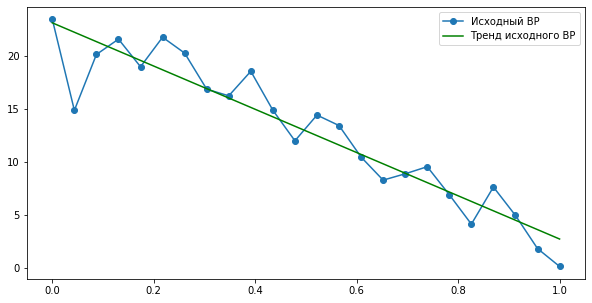

In [28]:
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Y,'o-',label='Исходный ВР') # считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g',label='Тренд исходного ВР')
plt.legend()
plt.show()

##### На основе линейной регрессии из scipy.stats:

Все коэффициенты и статистика регрессии:
LinregressResult(slope=-20.437600000000003, intercept=23.13046666666667, rvalue=-0.9402558063448317, pvalue=9.034559588896637e-12, stderr=1.5777924678217814, intercept_stderr=0.9207871804076035)


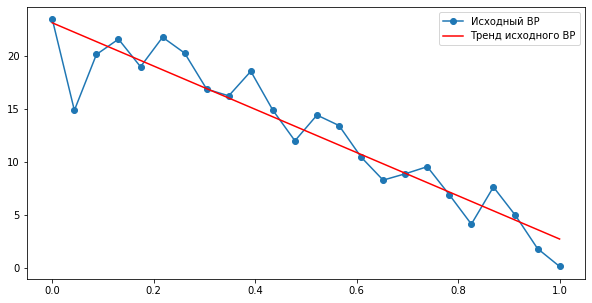

In [29]:
out = stats.linregress(t, Y)
print('Все коэффициенты и статистика регрессии:')
print(out)
plt.figure(figsize = (10, 5))
plt.plot(t, Y, 'o-',label='Исходный ВР') # строим график кривой вместе с трендом
plt.plot(t, out.intercept + out.slope*t, 'r',label='Тренд исходного ВР')
plt.legend()
plt.show()

##### На основе подгонки кривых curve_fit из scipy.optimize:

In [30]:
def func(t, b0, b1): # описываем функцию тренда
    return b0 + b1 * t # линейный тренд с 2 параметрами
popt, pcov = curve_fit(func, t, Y) # проводим подгонку МНК
print('Коэффициенты B0 и B1:',popt) # получаем коэффициенты b0 & b1
print('Ковариационная матрица ошибок подгонки',pcov) # ковариационная матрица ошибок подгонки

Коэффициенты B0 и B1: [ 23.13046667 -20.4376    ]
Ковариационная матрица ошибок подгонки [[ 0.84784904 -1.24471454]
 [-1.24471454  2.48942907]]


#### На основе библиотеки sklearn:

In [31]:

reg = LinearRegression().fit(t.reshape(-1,1), Y)
print('Линейный коэффициент B1:',reg.coef_) # здесь выведется линейный коэффициент b1
print('Коэффициент B0 (смещение):',reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print('«Оценка» полученной регрессии:',reg.score(t.reshape(-1,1), Y),'(чем ближе она к 1.0, тем лучше тренд)')
# здесь будет выведена «оценка» (равная R^2) полученной регрессии,чем ближе она к 1.0, тем лучше тренд

Линейный коэффициент B1: [-20.4376]
Коэффициент B0 (смещение): 23.130466666666667
«Оценка» полученной регрессии: 0.8840809813651695 (чем ближе она к 1.0, тем лучше тренд)


##### На основе statsmodel:

In [32]:
import statsmodels.api as sm
x_ = sm.add_constant(t.reshape(-1,1)) # создаем простую модель
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
print('Результирующие коэффициенты B0 и B1:',res.params) # получаем результирующие коэффициенты

Результирующие коэффициенты B0 и B1: [ 23.13046667 -20.4376    ]


#### Во всех реализациях получились одинаковые коэффициенты линейного тренда.

### Модель тренда второй степени

Коэффициенты B0, B1, B2: [ 21.1244152   -7.85418634 -12.58341363]
Ковариационная матрица ошибок подгонки [[  1.43095342  -5.59780706   4.56558736]
 [ -5.59780706  30.7031241  -28.63868466]
 [  4.56558736 -28.63868466  28.63868461]]


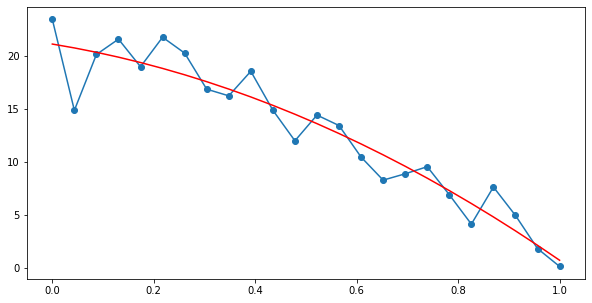

In [33]:
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')

def func(t, b0, b1,b2): # описываем функцию тренда
    return b0+b1*t+b2*t*t

popt2, pcov2 = curve_fit(func, t, Y) # проводим подгонку МНК
print('Коэффициенты B0, B1, B2:',popt2) # получаем коэффициенты
print('Ковариационная матрица ошибок подгонки',pcov2) # ковариационная матрица ошибок подгонки
plt.plot(t, popt2[0]+popt2[1]*t+popt2[2]*t*t,'r',label='Тренд исходного ВР')
plt.show()

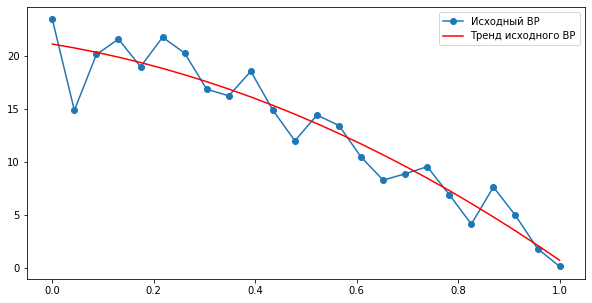

21.124415384615386
-7.854187412587454
-12.583412587412544


In [34]:
bb = np.polyfit(t,Y,2) # полиномиальная кривая второго порядка
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,bb[2]+bb[1]*t+bb[0]*t*t,'r',label='Тренд исходного ВР')
plt.legend()
plt.show()
print(bb[2])
print(bb[1])
print(bb[0])

### Модель тренда третьей степени

Коэффициенты B0, B1, B2: [ 20.36501756   2.35987869 -38.66922469  17.39054187]
Ковариационная матрица ошибок подгонки [[   2.25377829  -16.47910747   32.22294145  -18.39678629]
 [ -16.47910747  176.45174541 -400.18979195  247.44073488]
 [  32.22294145 -400.18979195  976.94093074 -631.94149074]
 [ -18.39678629  247.44073488 -631.94149074  421.29432376]]


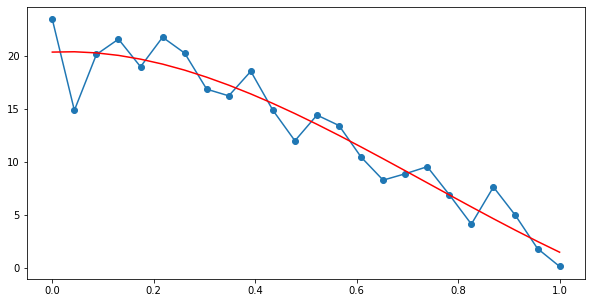

In [35]:
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')

def func(t, b0, b1,b2,b3): # описываем функцию тренда
    return b0+b1*t+b2*t*t+b3*t*t*t

popt3, pcov3 = curve_fit(func, t, Y) # проводим подгонку МНК
print('Коэффициенты B0, B1, B2:',popt3) # получаем коэффициенты
print('Ковариационная матрица ошибок подгонки',pcov3) # ковариационная матрица ошибок подгонки
plt.plot(t, popt3[0]+popt3[1]*t+popt3[2]*t*t+popt3[3]*t*t*t,'r',label='Тренд исходного ВР')
plt.show()

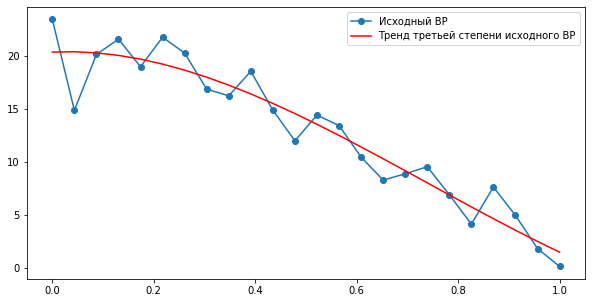

20.365017094017084
2.3598839678840573
-38.669236985237184
17.390549598549715


In [36]:
bb = np.polyfit(t,Y,3) # полиномиальная кривая третьего порядка
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,bb[3]+bb[2]*t+bb[1]*t*t+bb[0]*t*t*t,'r',label='Тренд третьей степени исходного ВР')
plt.legend()
plt.show()
print(bb[3])
print(bb[2])
print(bb[1])
print(bb[0])

#### Во всех реализациях получились одинаковые коэффициенты тренда.

### Модель экспоненциального тренда

Коэффициенты B0 и B1: [24.20715768 -1.40718221]
Ковариационная матрица ошибок подгонки [[ 2.59203487 -0.21439175]
 [-0.21439175  0.03213805]]


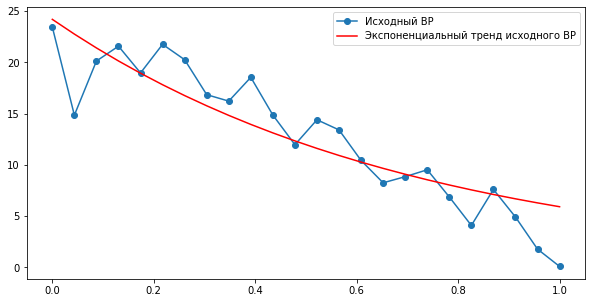

In [37]:
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')

def func(t, b0, b1): # описываем функцию тренда
    return b0*np.exp(b1*t) 

popt_exp, pcov_exp = curve_fit(func, t, Y) # проводим подгонку МНК
print('Коэффициенты B0 и B1:',popt_exp) # получаем коэффициенты b0 & b1
print('Ковариационная матрица ошибок подгонки',pcov_exp) # ковариационная матрица ошибок подгонки

Z = np.zeros(len(t))
for i in range(len(t)):
    Z[i] = popt_exp[0]*np.exp(popt_exp[1]*t[i])

plt.plot(t, Z,'r',label='Экспоненциальный тренд исходного ВР')
plt.legend()
plt.show()

#### Изобразим все тренды на одном графике

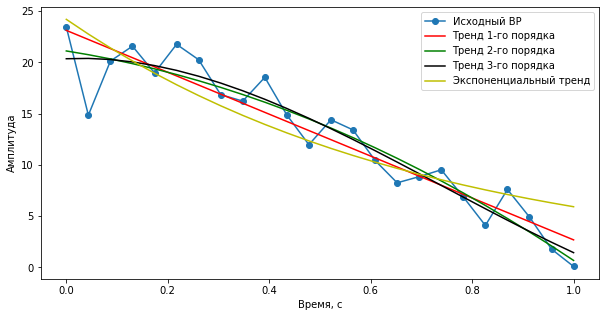

In [38]:
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,popt[0]+popt[1]*t,'r',label='Тренд 1-го порядка')
plt.plot(t, popt2[0]+popt2[1]*t+popt2[2]*t*t,'g',label='Тренд 2-го порядка')
plt.plot(t, popt3[0]+popt3[1]*t+popt3[2]*t*t+popt3[3]*t*t*t,'k',label='Тренд 3-го порядка')
plt.plot(t, Z,'y',label='Экспоненциальный тренд')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

### Теперь построим тренд методом сглаживания

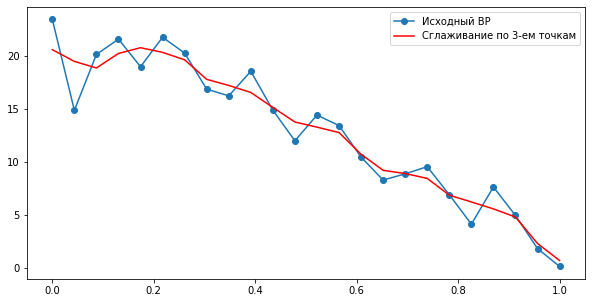

In [39]:
def smooth(x, window_len):
    if window_len<3:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Smoothed_data = smooth(Y, 3) # сглаживание по 3 точкам
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,Smoothed_data,'r',label='Сглаживание по 3-ем точкам')
plt.legend()
plt.show()

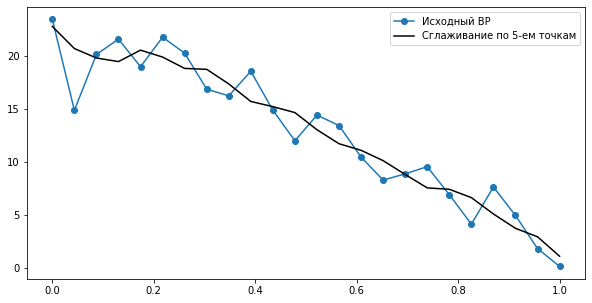

In [40]:
def smooth(x, window_len):
    if window_len<5:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Smoothed_data_5 = smooth(Y, 5) # сглаживание по 5 точкам
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
# plt.plot(t,Smoothed_data,'r',label='Сглаживание по 3-ем точкам')
plt.plot(t,Smoothed_data_5,'k',label='Сглаживание по 5-ем точкам')
plt.legend()
plt.show()

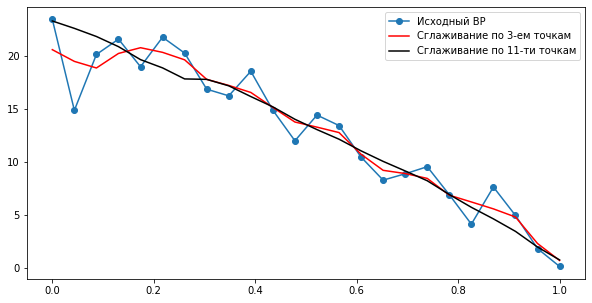

In [44]:
def smooth(x, window_len):
    if window_len<11:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

Smoothed_data_11 = smooth(Y, 11) # сглаживание по 5 точкам
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,Smoothed_data,'r',label='Сглаживание по 3-ем точкам')
plt.plot(t,Smoothed_data_11,'k',label='Сглаживание по 11-ти точкам')
plt.legend()
plt.show()

### Сглаживание по трем и семи точкам

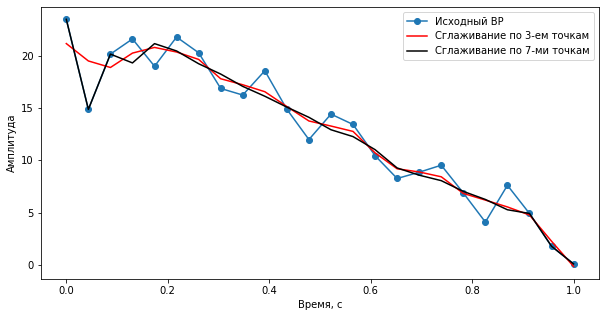

In [42]:
Y3 = np.zeros(len(Y))
Y3[0]=(5*Y[0]+2*Y[1]-Y[2])/6    # крайние значения
Y3[23]=(5*Y[23]+2*Y[22]-Y[21])/6

for i in range(1, len(Y)-1):
    Y3[i] = (Y[i-1]+Y[i]+Y[i+1])/3

Y7 = np.zeros(len(Y))
Y7[0]=Y[0]
Y7[1]=Y[1]
Y7[2]=Y[2]
Y7[len(Y)-3]=Y[len(Y)-3]    # крайние значения первоначального ВР
Y7[len(Y)-2]=Y[len(Y)-2]
Y7[len(Y)-1]=Y[len(Y)-1]

for i in range(3, len(Y)-3):
    Y7[i] = (-2*Y[i-3]+3*Y[i-2]+6*Y[i-1]+7*Y[i]+6*Y[i+1]+3*Y[i+2]-2*Y[i+2])/21
    
plt.figure(figsize=(10,5))
plt.plot(t,Y,'o-',label='Исходный ВР')
plt.plot(t,Y3,'r',label='Сглаживание по 3-ем точкам')
plt.plot(t,Y7,'k',label='Сглаживание по 7-ми точкам')
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

### Экспоненциальное сглаживание

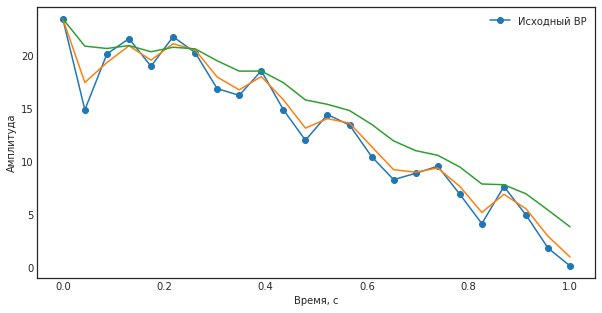

In [43]:
def exponential_smoothing(data, alpha):
    result = [data[0]]
    for n in range(1, len(data)):
        result.append((1 - alpha) * result[n-1] + alpha * data[n])
    return result

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(10, 5))
    plt.plot(t,Y,'o-',label='Исходный ВР')
    for alpha in [0.7, 0.3]:  # показываю два значения альфа
        plt.plot(t, exponential_smoothing(Y, alpha))
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.show()


Здесь модельное значение представляет собой средневзвешенную между текущим истинным и предыдущим модельным значениями. Вес альфа  называется сглаживающим фактором. Он определяет, как быстро мы будем "забывать" последнее доступное истинное наблюдение. Чем меньше альфа, тем больше влияния оказывают предыдущие модельные значения, и тем сильнее сглаживается ряд.